# Overview

The goal of this tutorial is to provide an example of the use of SciPy. SciPy is a collection of many different algorihtms, so there's no way we can cover everything here. For more information, try looking at the:
- [SciPy Reference Guide](https://docs.scipy.org/doc/scipy/reference/)
- [SciPy Lectures](http://www.scipy-lectures.org/)

SciPy is a library that wraps general-purpose, scientific algorithms. These algorithms are frequently written in FORTRAN, so SciPy gives you the ability to work with these performant algorithms without dealing with the compiled languages.

- Integration
- Optimization
- Spatial Algorithms
- ODE Solvers
- Interpolation
- Statistics
- Linear Algebra
- Special Functions
- Signal Processing
- FFT

# An Example Using Spatial

This example walks through using the spatial algorithms library in SciPy to reduce some point data.

In [1]:
# Set-up to have matplotlib use its IPython notebook backend
%matplotlib inline

In [2]:
# Convention for import of the pyplot interface
import matplotlib.pyplot as plt
import numpy as np

Let's create some data, using normally distributed locations.

In [3]:
# Create some example data
import scipy.stats

# Initialize the RandomState so that this is repeatable
rs = np.random.RandomState(seed=20170122)

# Set up the distribution
dist = scipy.stats.norm(loc=5, scale=2)

# Request a bunch of random values from this distribution
x, y = dist.rvs(size=(2, 100000), random_state=rs)

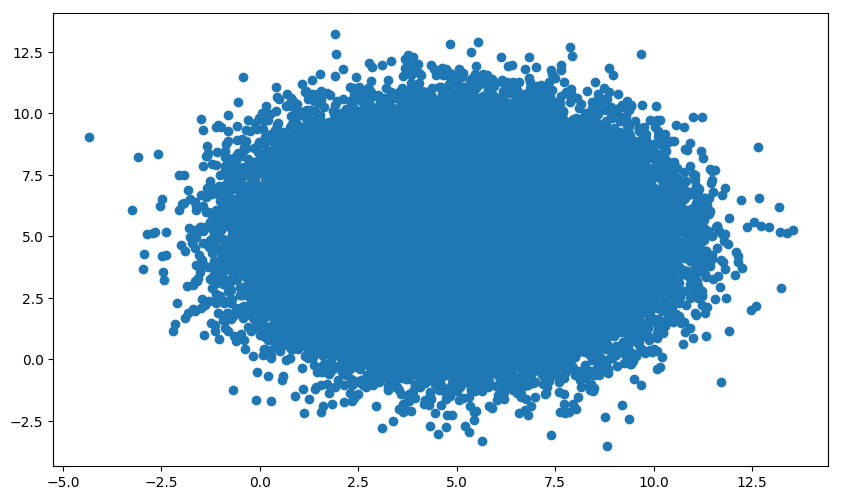

In [4]:
# Go ahead and explicitly create a figure and an axes
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

# Do a scatter plot of our locations
ax.scatter(x, y)

Now let's create some more data to analyze.

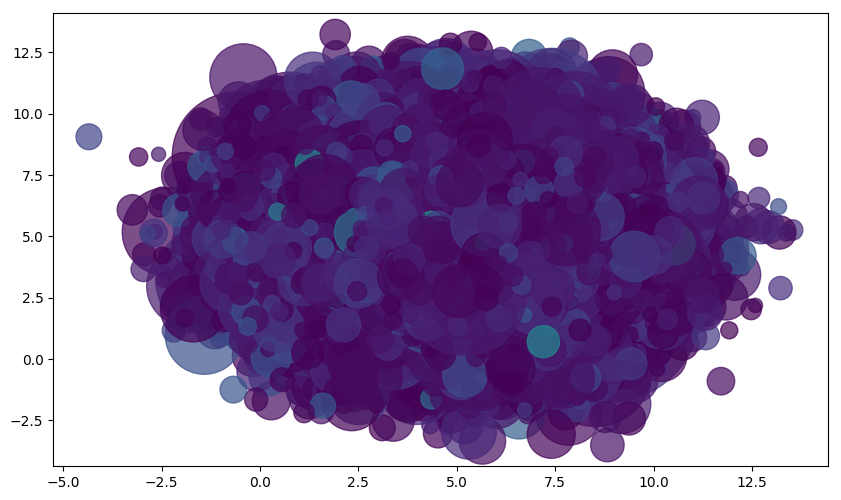

In [5]:
# Some exponentially distributed values to make things interesting
size = scipy.stats.expon(loc=10, scale=10).rvs(size=100000, random_state=rs)
strength = scipy.stats.expon(loc=5).rvs(size=100000, random_state=rs)

# Make the scatter plot more complex--change the color of markers by strength,
# and scale their size by the size variable
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

# c specifies what to color by, s what to scale by
ax.scatter(x, y, c=strength, s=size**2, alpha=0.7)

So we have a messy dataset, and we'd like to pull reduce the number of points. For this exercise, let's pick points and clear out the radius around them. We can do this by favoring certain points; in this case, we'll favor those with higher strength values.

In [8]:
import scipy.spatial

# Put the x and y values together--so that this is (N, 2)
xy = np.vstack((x, y)).T

# Create a mask--all True values initially. We keep values where this is True.
keep = np.ones(x.shape, dtype=np.bool)

# Get the indices that would sort the strength array--and can be used to sort
# the point locations by strength
sorted_indices = np.argsort(strength)[::-1]

# Create a kdTree--a data structure that makes it easy to do search in nD space
tree = scipy.spatial.cKDTree(xy)

# Loop over all the potential points
for sort_index in sorted_indices:
    # Check if this point is being kept
    if keep[sort_index]:
        # Use the kdTree to find the neighbors around the current point
        neighbors = tree.query_ball_point(xy[sort_index], r=1)
        
        # Eliminate the points within that radius--but not the current point
        for index in neighbors:
            if index != sort_index:
                keep[index] = False

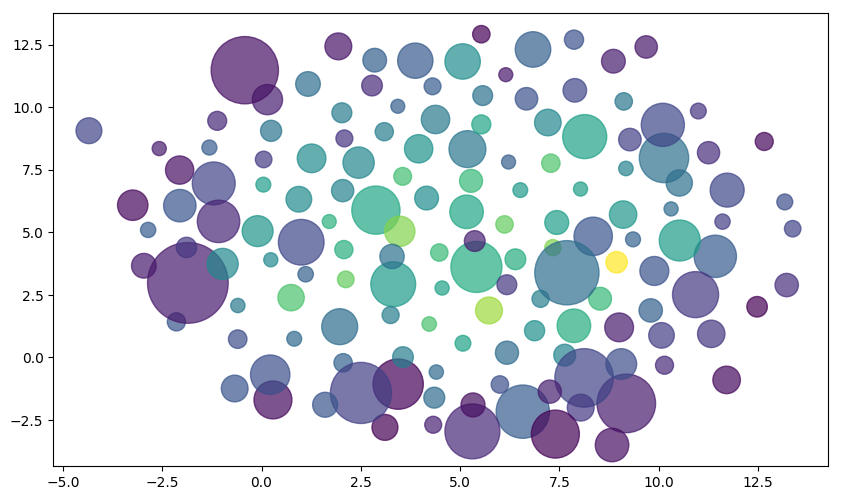

In [9]:
# Make the scatter plot more complex--change the color of markers by strength,
# and scale their size by the size variable
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

# c specifies what to color by, s what to scale by
ax.scatter(x[keep], y[keep], c=strength[keep], s=size[keep]**2, alpha=0.7)

## Exercise

Give it a try yourself. Try to modify the code above to:

- Filter by size instead of strength
- Change the radius